Import و مسیرها

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# project_root = یک سطح بالاتر از cwd
project_root = Path.cwd().parent

# relative paths
proc_v2 = project_root / "data" / "processed" / "v2"
fig_dir = project_root / "reports" / "figures"
ans_dir = project_root / "reports" / "answers"

# make sure folders exist
fig_dir.mkdir(parents=True, exist_ok=True)
ans_dir.mkdir(parents=True, exist_ok=True)

# Style
sns.set(style="whitegrid", font="Tahoma", palette="Set2")

# Load data
df_match = pd.read_parquet(proc_v2 / "match_clean_v2.parquet")

print("project_root:", project_root)
print("match file:", proc_v2 / "match_clean_v2.parquet")
print("shape:", df_match.shape)


project_root: c:\Users\mit\Desktop\Finaaal
match file: c:\Users\mit\Desktop\Finaaal\data\processed\v2\match_clean_v2.parquet
shape: (16873, 64)


پردازش داده

In [ ]:
top_countries = (
    df_match["country"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "country", "country": "num_players"})
)

top_countries.columns = ["country", "num_players"]

top_countries = top_countries.head(10)

print(top_countries)


     country  num_players
0     France         1283
1      Italy         1182
2        USA          993
3      Spain          818
4  Argentina          743
5  Australia          699
6      Japan          693
7    Germany          682
8     Russia          673
9     Turkey          499


ذخیره خروجی

In [11]:
top_countries.to_csv(ans_dir / "q_new1_top_countries.csv", index=False, encoding="utf-8-sig")
print("Saved table to reports/answers/q_new1_top_countries.csv")


Saved table to reports/answers/q_new1_top_countries.csv


نمودار

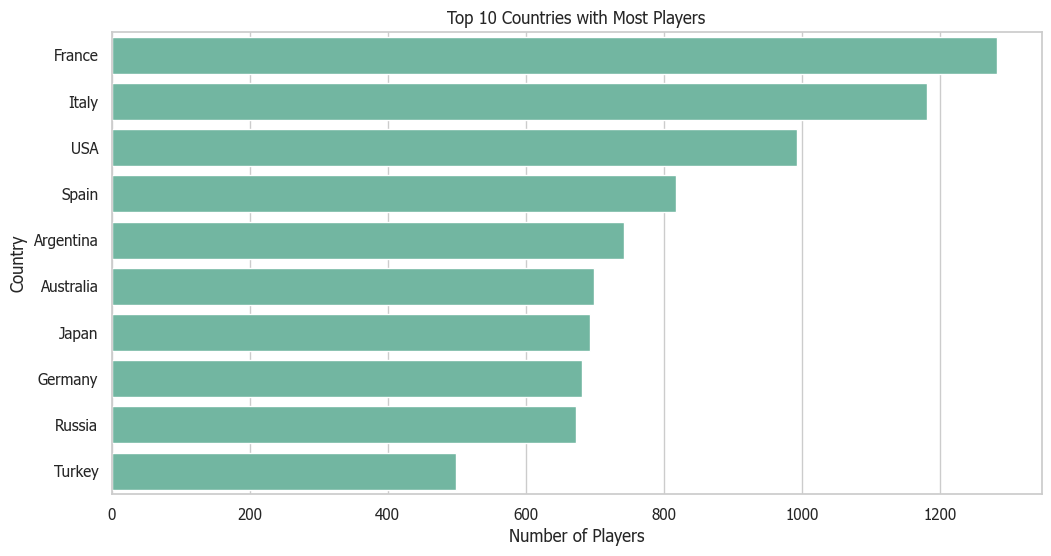

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x="num_players", y="country")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.title("Top 10 Countries with Most Players")
plt.savefig(fig_dir / "q_new1_top_countries.png", dpi=300, bbox_inches="tight")
plt.show()
